<a href="https://colab.research.google.com/github/JosuePerezValenzuela/Visualizacion-y-Dashboard-con-Jupyter/blob/master/AnalisiAIRBNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arianazmoudeh/airbnbopendata")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/airbnbopendata


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(path + "/Airbnb_Open_Data.csv")
df.head()

/tmp/ipython-input-3255761310.py:5: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + "/Airbnb_Open_Data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [36]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [38]:
df.nunique()

,0
id,102058
NAME,61281
host id,102057
host_identity_verified,2
host name,13190
neighbourhood group,7
neighbourhood,224
lat,21991
long,17774
country,1


In [39]:
df["service fee"] = df["service fee"].str.replace("$", "").astype(float)

In [40]:
df["price"] = df["price"].str.replace("$", "", regex=False).str.replace(",", "", regex=False).astype(float)

In [41]:
df[["price", "service fee"]].head()

,price,service fee
0,966.0,193.0
1,142.0,28.0
2,620.0,124.0
3,368.0,74.0
4,204.0,41.0


In [42]:
cols_to_drop = ["license", "country", "country code", "NAME", "host name", "host id"]

df.drop(cols_to_drop, axis=1, inplace=True)
print(df.columns)

Index(['id', 'host_identity_verified', 'neighbourhood group', 'neighbourhood',
       'lat', 'long', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules'],
      dtype='object')


In [43]:
df.describe()

,id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,102591.000000,102591.000000,102385.000000,102352.000000,102326.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,40.728094,-73.949644,2012.487464,625.293536,125.026924,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,0.055857,0.049521,5.765556,331.671614,66.325739,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,40.688740,-73.982580,2007.000000,340.000000,68.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,40.722290,-73.954440,2012.000000,624.000000,125.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,40.762760,-73.932350,2017.000000,913.000000,183.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [44]:
df["last review"] = pd.to_datetime(df["last review"], errors = "coerce")

df["last review"].dtypes

dtype('<M8[ns]')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   host_identity_verified          102310 non-null  object        
 2   neighbourhood group             102570 non-null  object        
 3   neighbourhood                   102583 non-null  object        
 4   lat                             102591 non-null  float64       
 5   long                            102591 non-null  float64       
 6   instant_bookable                102494 non-null  object        
 7   cancellation_policy             102523 non-null  object        
 8   room type                       102599 non-null  object        
 9   Construction year               102385 non-null  float64       
 10  price                           102352 non-null  float64

In [46]:
df.nunique()

,0
id,102058
host_identity_verified,2
neighbourhood group,7
neighbourhood,224
lat,21991
long,17774
instant_bookable,2
cancellation_policy,3
room type,4
Construction year,20


In [47]:
df["neighbourhood group"].value_counts()

,count
neighbourhood group,
Manhattan,43792
Brooklyn,41842
Queens,13267
Bronx,2712
Staten Island,955
brookln,1
manhatan,1


In [48]:
df["neighbourhood group"] = df["neighbourhood group"].replace({"brookln": "Brooklyn", "manhatan": "Manhattan"})

In [49]:
df["neighbourhood group"].value_counts()

,count
neighbourhood group,
Manhattan,43793
Brooklyn,41843
Queens,13267
Bronx,2712
Staten Island,955


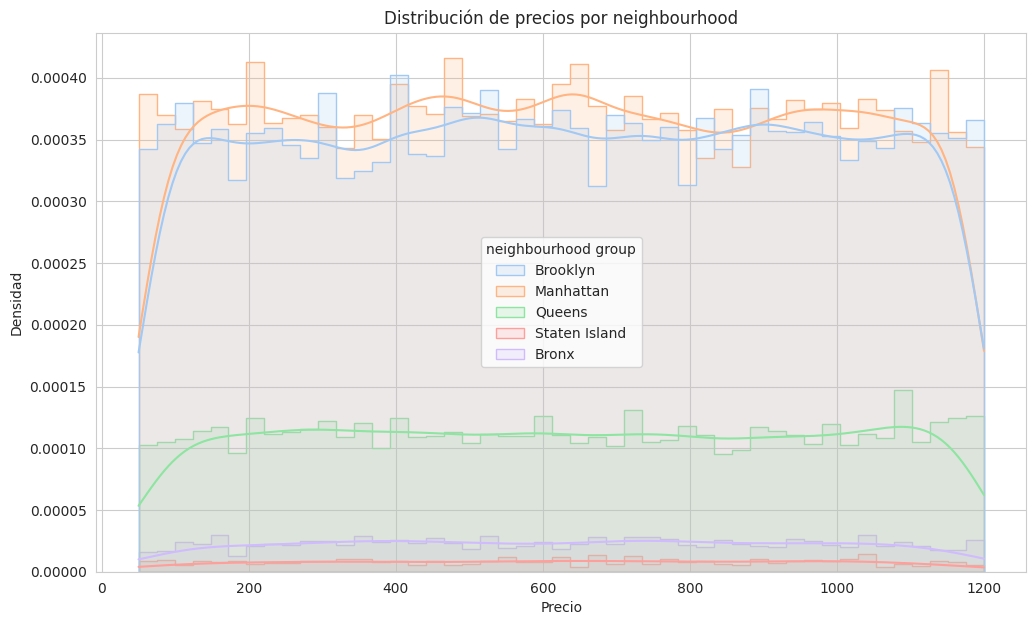

In [50]:
# Grafico 1 Resumir / sintetizar datos
# Resumir la distribucion de precios de los alojamientos de Airbnb, para identificar el rango tipico, su dispersion y posibles outliers

plt.figure(figsize=(12, 7))
sns.histplot(data=df, x="price", hue="neighbourhood group", bins="auto", kde=True, stat="density"
, alpha=0.2, element="step")
plt.title("Distribución de precios por neighbourhood")
plt.xlabel("Precio")
plt.ylabel("Densidad")
plt.show()

Se tiene mas "Departments" en Brooklyn y Manhattan, seguido de queens, staten Island y Bronx

In [51]:
df.groupby("neighbourhood group")["price"].mean()

,price
neighbourhood group,
Bronx,627.766359
Brooklyn,626.561078
Manhattan,622.436508
Queens,630.207647
Staten Island,624.490546


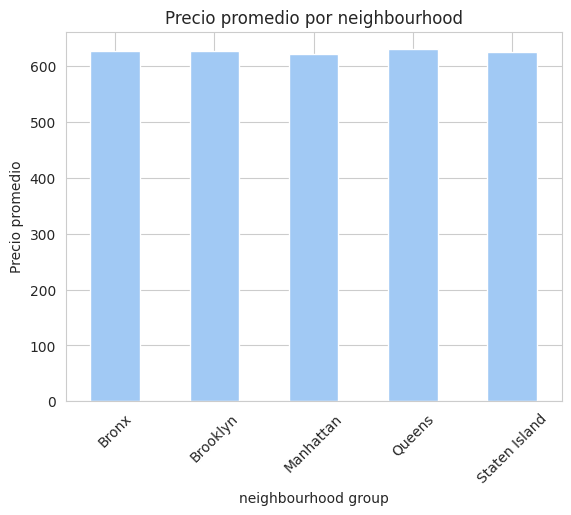

In [52]:
df.groupby("neighbourhood group")["price"].mean().plot(kind="bar", title="Precio promedio por neighbourhood", rot=45)
plt.xlabel("neighbourhood group")
plt.ylabel("Precio promedio")
plt.show()

El neighbourhood no es un diferenciador en el precio de los alojamientos

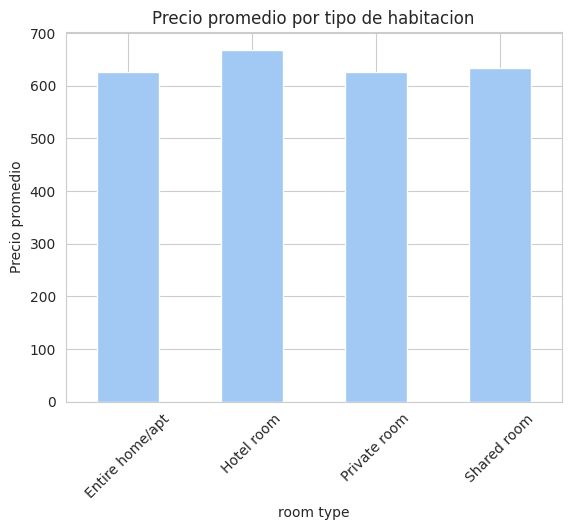

In [53]:
df.groupby("room type")["price"].mean().plot(kind="bar", title="Precio promedio por tipo de habitacion", rot=45)
plt.xlabel("room type")
plt.ylabel("Precio promedio")
plt.show()

Tampoco el tipo de habitacion no es un determinante sobre el precio, se tendra que hacer un mapa de calor para ver cual es el valor mas influyente en este aspecto

In [54]:
# Grafico 2 Deteccion de outliers
# Identificar los outliers en las columnas numericas

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove("id")
numeric_cols.remove("lat")
numeric_cols.remove("long")
print(numeric_cols)

['Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365']


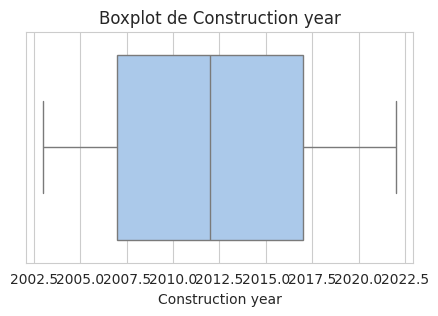

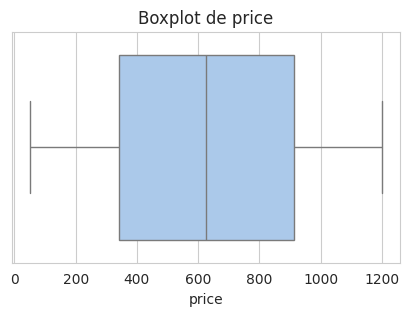

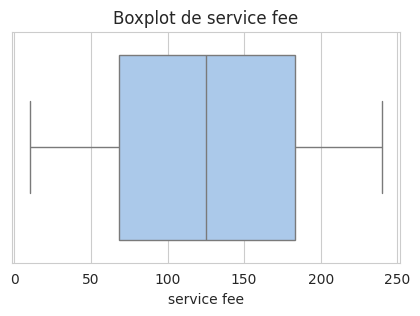

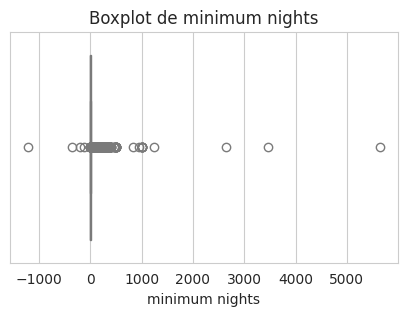

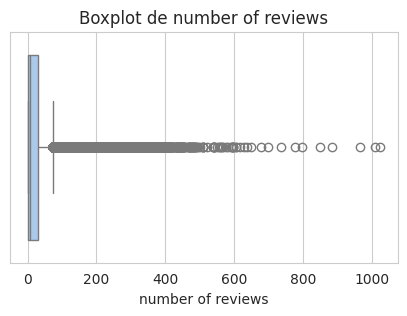

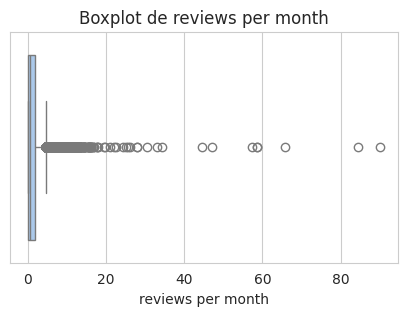

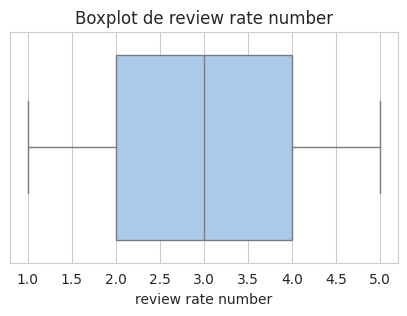

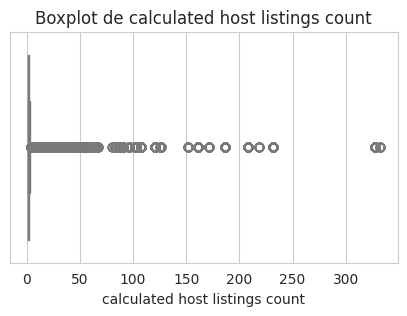

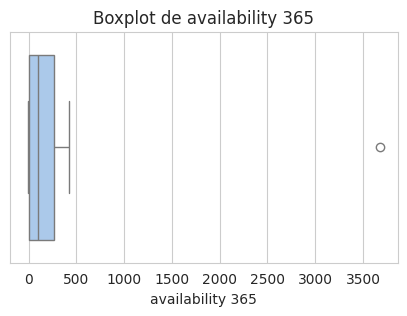

In [55]:
sns.set_style("whitegrid")
sns.set_palette("pastel")
for col in numeric_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot de {col}")
    plt.show()

Las columnas de minimum nights, number of reviews, reviews per month, calculated host listings count y availability tienen outliers

/tmp/ipython-input-3023767106.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,


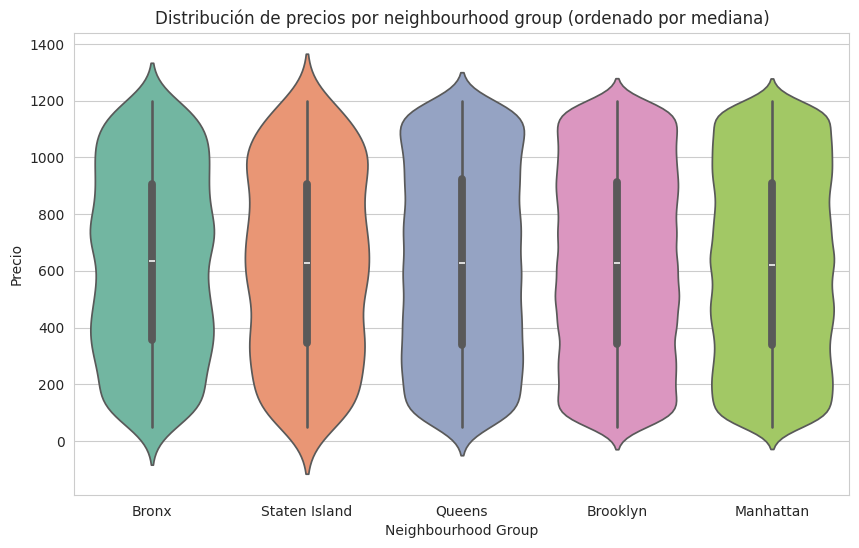

In [56]:
# Grafico 3 Ordenacion de distribuciones

order = (df.groupby("neighbourhood group")["price"]
         .median()
         .sort_values(ascending=False)
         .index)

plt.figure(figsize=(10,6))
sns.violinplot(data=df,
               x="neighbourhood group",
               y="price",
               order=order,
               inner="box",
               palette="Set2")

plt.title("Distribución de precios por neighbourhood group (ordenado por mediana)")
plt.ylabel("Precio")
plt.xlabel("Neighbourhood Group")
plt.show()

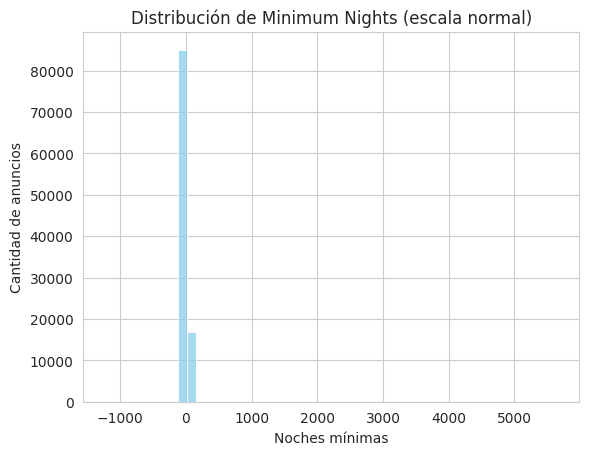

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


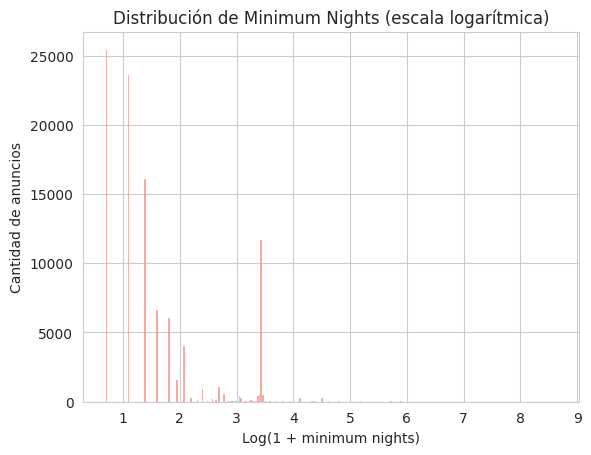

In [57]:
# Grafico 4 Deteccion de anomalias

sns.histplot(data=df, x="minimum nights", bins=50, kde=False, color="skyblue")
plt.title("Distribución de Minimum Nights (escala normal)")
plt.xlabel("Noches mínimas")
plt.ylabel("Cantidad de anuncios")
plt.show()

sns.histplot(np.log1p(df["minimum nights"]), bins="auto", kde=False, color="salmon")
plt.title("Distribución de Minimum Nights (escala logarítmica)")
plt.xlabel("Log(1 + minimum nights)")
plt.ylabel("Cantidad de anuncios")
plt.show()

In [58]:
outlier_cols = ["minimum nights", "number of reviews", "reviews per month",
                "calculated host listings count", "availability 365"]
iqr_values = {}

for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_values[col] = {"Q1": Q1, "Q3": Q3, "IQR": IQR}

print(iqr_values)

{'minimum nights': {'Q1': np.float64(2.0), 'Q3': np.float64(5.0), 'IQR': np.float64(3.0)}, 'number of reviews': {'Q1': np.float64(1.0), 'Q3': np.float64(30.0), 'IQR': np.float64(29.0)}, 'reviews per month': {'Q1': np.float64(0.22), 'Q3': np.float64(2.0), 'IQR': np.float64(1.78)}, 'calculated host listings count': {'Q1': np.float64(1.0), 'Q3': np.float64(2.0), 'IQR': np.float64(1.0)}, 'availability 365': {'Q1': np.float64(3.0), 'Q3': np.float64(269.0), 'IQR': np.float64(266.0)}}


In [59]:
outlier_bounds = {}

for col in iqr_values.keys():
    lower_bound = iqr_values[col]["Q1"] - 1.5 * iqr_values[col]["IQR"]
    upper_bound = iqr_values[col]["Q3"] + 1.5 * iqr_values[col]["IQR"]
    outlier_bounds[col] = {"lower_bound": lower_bound, "upper_bound": upper_bound}

print(outlier_bounds)

{'minimum nights': {'lower_bound': np.float64(-2.5), 'upper_bound': np.float64(9.5)}, 'number of reviews': {'lower_bound': np.float64(-42.5), 'upper_bound': np.float64(73.5)}, 'reviews per month': {'lower_bound': np.float64(-2.4499999999999997), 'upper_bound': np.float64(4.67)}, 'calculated host listings count': {'lower_bound': np.float64(-0.5), 'upper_bound': np.float64(3.5)}, 'availability 365': {'lower_bound': np.float64(-396.0), 'upper_bound': np.float64(668.0)}}


In [60]:
for col in outlier_bounds.keys():
    lower_bound = outlier_bounds[col]["lower_bound"]
    upper_bound = outlier_bounds[col]["upper_bound"]

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

df[outlier_bounds.keys()].describe()

,minimum nights,number of reviews,reviews per month,calculated host listings count,availability 365
count,102190.000000,102416.000000,86720.000000,102280.000000,102151.000000
mean,3.847862,20.034370,1.292789,1.705627,141.103797
std,3.048983,25.233932,1.355787,0.994997,134.992482
min,-2.500000,0.000000,0.010000,1.000000,-10.000000
25%,2.000000,1.000000,0.220000,1.000000,3.000000
50%,3.000000,7.000000,0.740000,1.000000,96.000000
75%,5.000000,30.000000,2.000000,2.000000,269.000000
max,9.500000,73.500000,4.670000,3.500000,668.000000


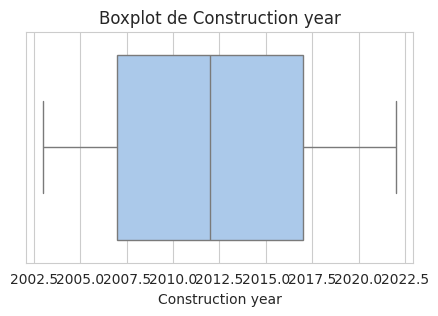

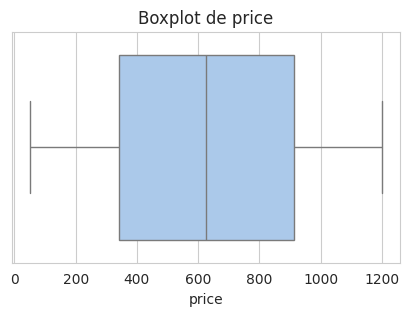

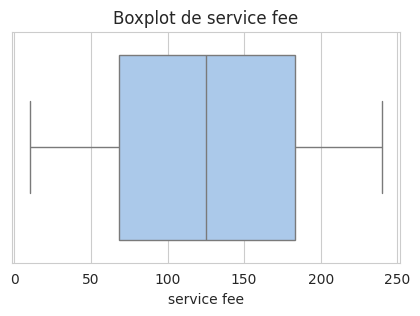

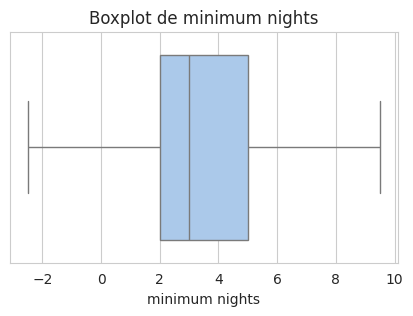

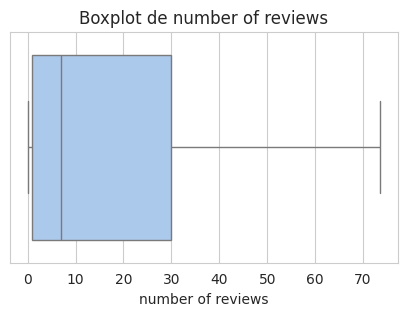

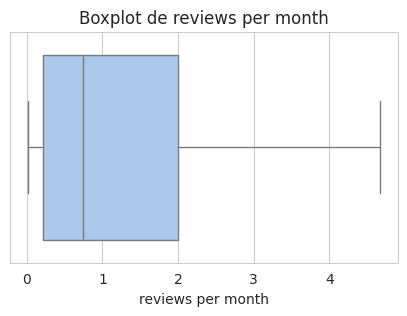

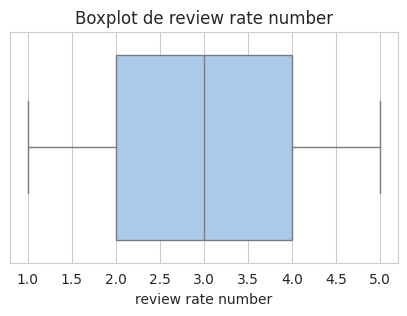

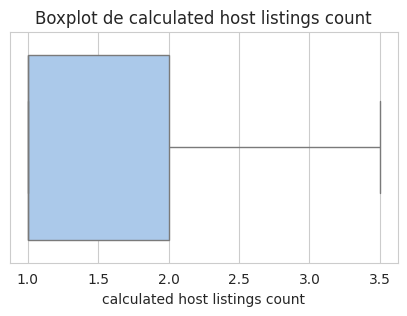

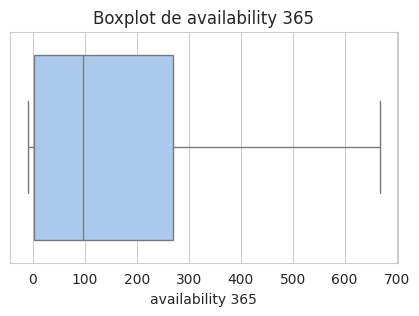

In [61]:
sns.set_style("whitegrid")
sns.set_palette("pastel")
for col in numeric_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot de {col}")
    plt.show()

In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled["reviews per month"] = df_scaled["reviews per month"].fillna(0)

cat_cols = ["neighbourhood group","neighbourhood", "room type", "cancellation_policy", "instant_bookable", "host_identity_verified"]

for col in cat_cols:
    mapping = df_scaled.groupby(col)["price"].mean().to_dict()
    df_scaled[col] = df_scaled[col].map(mapping)

numeric_cols = df_scaled.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove("id")
numeric_cols.remove("lat")
numeric_cols.remove("long")
df_scaled.info()

df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   host_identity_verified          102310 non-null  float64       
 2   neighbourhood group             102570 non-null  float64       
 3   neighbourhood                   102583 non-null  float64       
 4   lat                             102591 non-null  float64       
 5   long                            102591 non-null  float64       
 6   instant_bookable                102494 non-null  float64       
 7   cancellation_policy             102523 non-null  float64       
 8   room type                       102599 non-null  float64       
 9   Construction year               102385 non-null  float64       
 10  price                           102352 non-null  float64

In [63]:
df_scaled.describe()

,id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,102310.000000,102570.000000,102583.000000,102591.000000,102591.000000,102494.000000,102523.000000,102599.000000,102385.000000,102352.000000,102326.000000,102190.000000,102416.000000,86706,102599.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,0.500440,0.366460,0.552217,40.728094,-73.949644,0.497785,0.429866,0.006588,0.499340,0.500255,0.500117,0.528988,0.272576,2019-06-12 03:40:52.065601024,0.233984,0.569776,0.282251,0.222867
min,1.001254e+06,0.000000,0.000000,0.000000,40.499790,-74.249840,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012-07-11 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,1.508581e+07,0.000000,0.000000,0.543918,40.688740,-73.982580,0.000000,0.000000,0.000000,0.210526,0.252174,0.252174,0.375000,0.013605,2018-10-28 00:00:00,0.019272,0.250000,0.000000,0.019174
50%,2.913660e+07,1.000000,0.530755,0.552493,40.722290,-73.954440,0.000000,0.291096,0.001723,0.473684,0.499130,0.500000,0.458333,0.095238,2019-06-14 00:00:00,0.102784,0.500000,0.000000,0.156342
75%,4.320120e+07,1.000000,0.530755,0.560816,40.762760,-73.932350,1.000000,1.000000,0.001723,0.736842,0.750435,0.752174,0.625000,0.408163,2019-07-05 00:00:00,0.366167,0.750000,0.400000,0.411504
max,5.736742e+07,1.000000,1.000000,1.000000,40.916970,-73.705220,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2058-06-16 00:00:00,1.000000,1.000000,1.000000,1.000000
std,1.625751e+07,0.500002,0.350800,0.022001,0.055857,0.049521,0.499998,0.419472,0.045225,0.303450,0.288410,0.288373,0.254082,0.343319,NaN,0.285070,0.321164,0.397999,0.199104


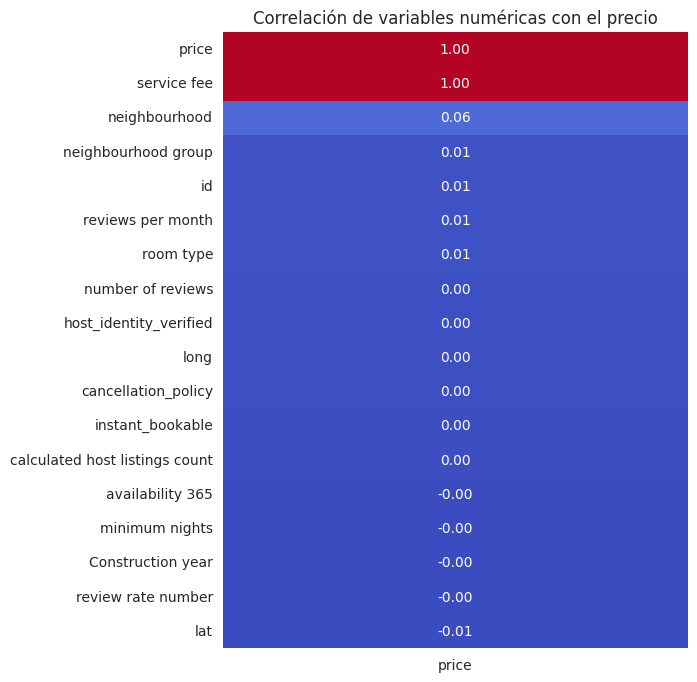

In [64]:
#Grafico 5 Correlacion entre variables

df_num = df_scaled.select_dtypes(include=[np.number])

corr = df_num.corr()["price"].sort_values(ascending=False)

plt.figure(figsize=(6, 8))
sns.heatmap(corr.to_frame(), annot=True, cmap="coolwarm", cbar=False, fmt=".2f")
plt.title("Correlación de variables numéricas con el precio")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   host_identity_verified          102310 non-null  float64       
 2   neighbourhood group             102570 non-null  float64       
 3   neighbourhood                   102583 non-null  float64       
 4   lat                             102591 non-null  float64       
 5   long                            102591 non-null  float64       
 6   instant_bookable                102494 non-null  float64       
 7   cancellation_policy             102523 non-null  float64       
 8   room type                       102599 non-null  float64       
 9   Construction year               102385 non-null  float64       
 10  price                           102352 non-null  float64

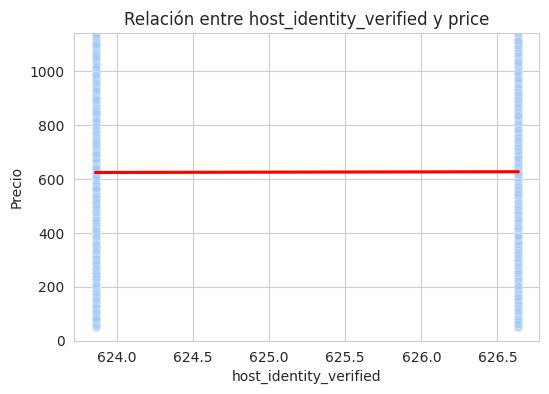

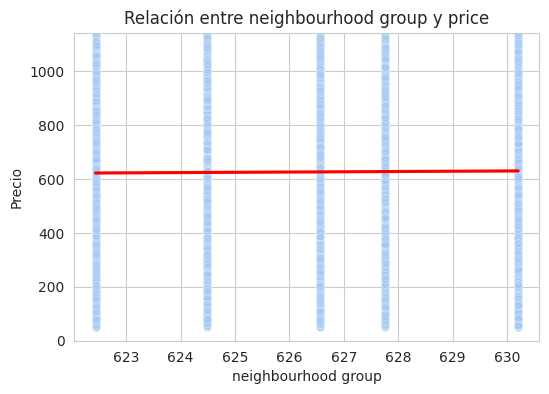

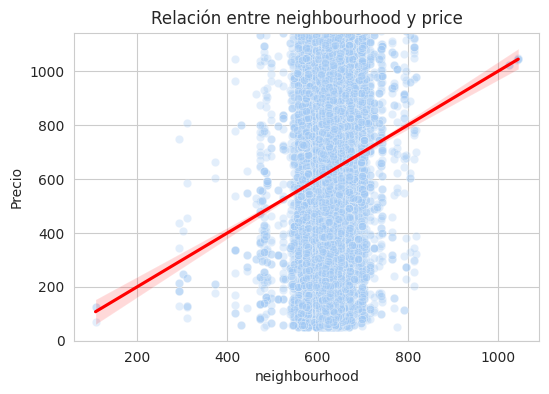

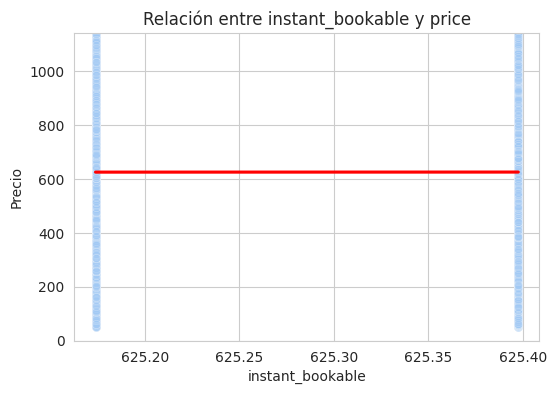

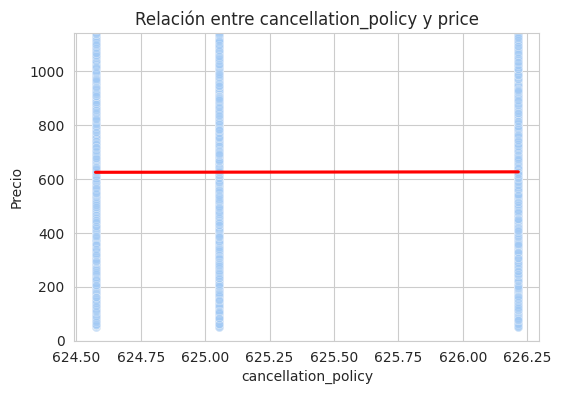

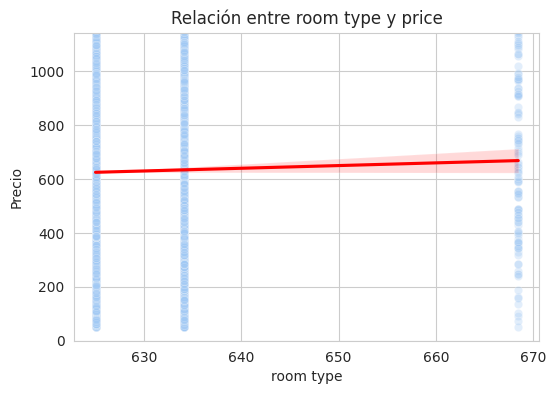

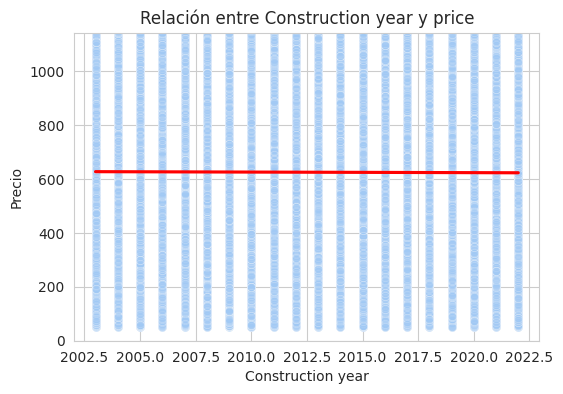

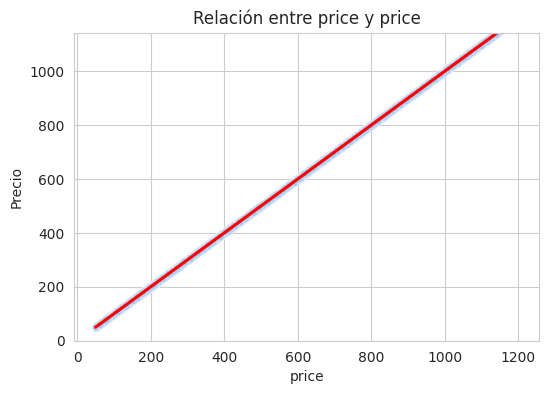

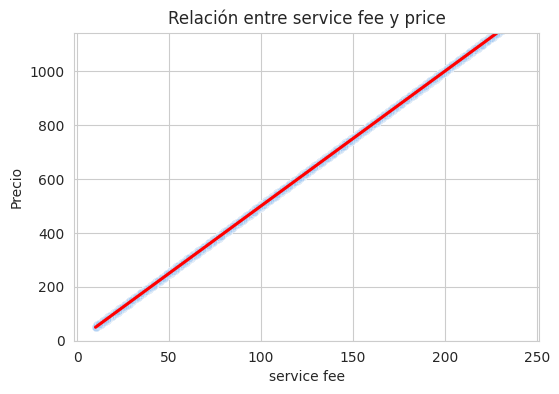

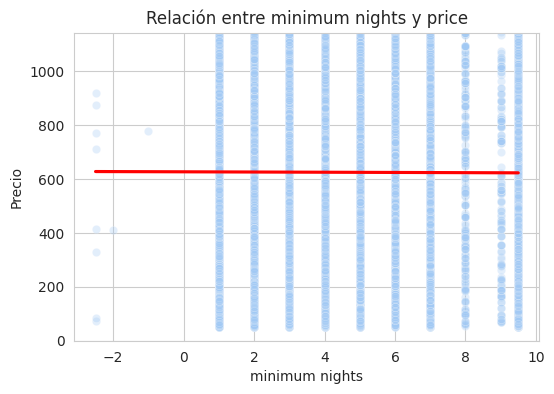

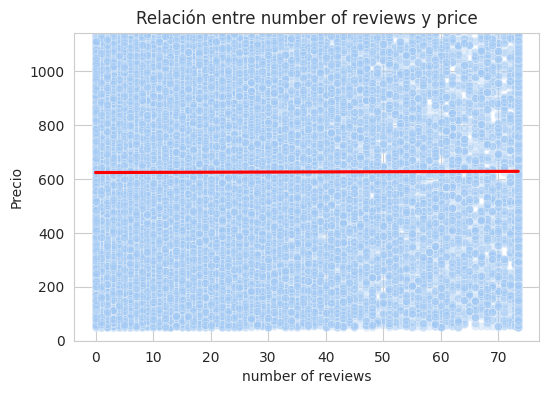

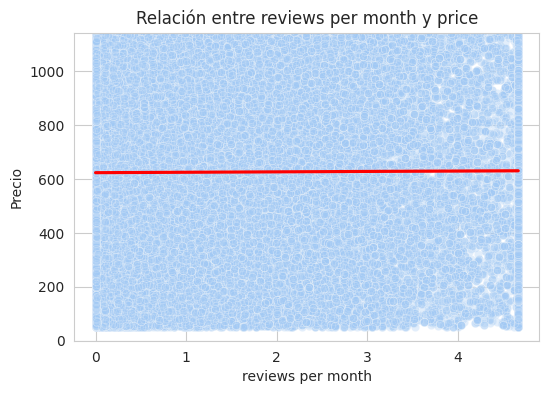

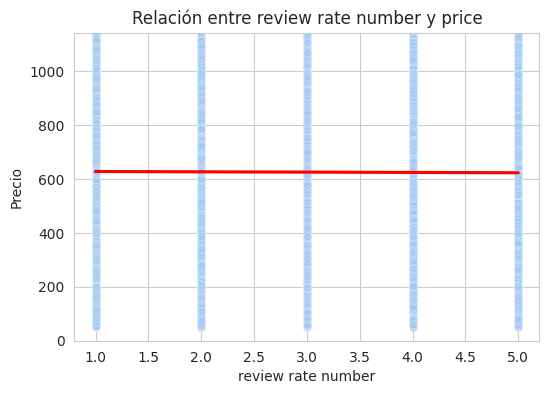

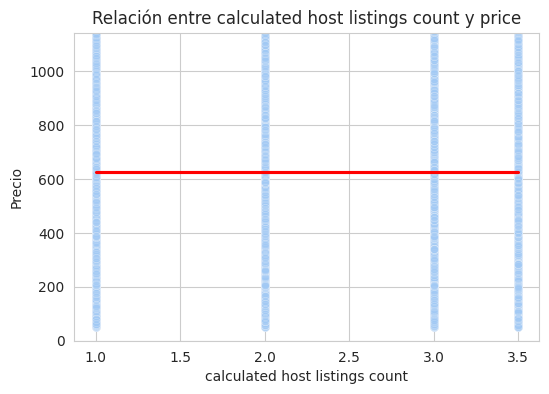

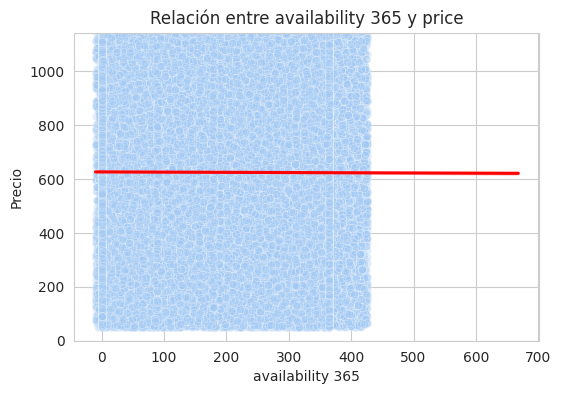

In [65]:
scaler = MinMaxScaler()
df3 = df.copy()
df3["reviews per month"] = df3["reviews per month"].fillna(0)

cat_cols = ["neighbourhood group","neighbourhood", "room type", "cancellation_policy", "instant_bookable", "host_identity_verified"]

for col in cat_cols:
    mapping = df3.groupby(col)["price"].mean().to_dict()
    df3[col] = df3[col].map(mapping)

numeric_cols = df3.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove("id")
numeric_cols.remove("lat")
numeric_cols.remove("long")
df3.info()

df3 = df3[df3["price"].notna()]  # eliminar NaN
df3 = df3[np.isfinite(df3["price"])]  # eliminar inf

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df3, x=col, y="price", alpha=0.3)
    sns.regplot(data=df3, x=col, y="price", scatter=False, color="red")  # línea de tendencia
    plt.title(f"Relación entre {col} y price")
    plt.xlabel(col)
    plt.ylabel("Precio")
    plt.ylim(0, np.percentile(df3["price"], 95))  # limitar el eje Y para que no distorsionen los outliers
    plt.show()


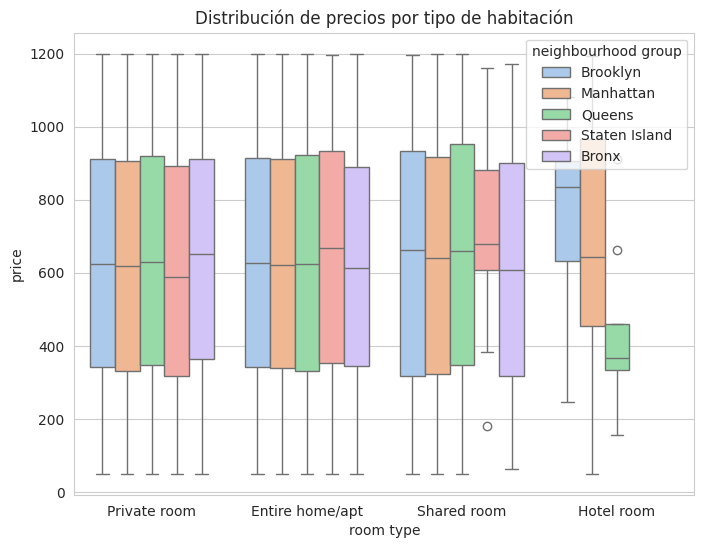

In [70]:
#Grafico 6 Agrupaciones
plt.figure(figsize=(8,6))
sns.boxplot(x="room type", y="price", data=df, hue="neighbourhood group")
plt.title("Distribución de precios por tipo de habitación")
plt.show()

In [71]:
!pip -q install jupyter-dash==0.4.2 dash==2.15.0 plotly==5.22.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.6 MB/s eta 0:00:00


In [80]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# KPI 1: Precio promedio
avg_price = df["price"].mean().round(2)

# KPI 2: Precio total acumulado
total_price = df["price"].sum().round(2)

# Gráf 1: Distribución (Boxplot por barrio)
fig1 = px.box(
    df,
    x="neighbourhood group",
    y="price",
    color="neighbourhood group",
    title="Distribución de Precios por Neighbourhood Group",
    points="outliers"
)
fig1.update_layout(yaxis=dict(title="Precio"), xaxis=dict(title="Barrio"),
                   showlegend=False)

# Gráf 2: Comparación (Precio promedio por tipo de habitación)
room_avg = df.groupby("room type")["price"].mean().reset_index()
fig2 = px.bar(
    room_avg,
    x="room type",
    y="price",
    color="room type",
    text="price",
    title="Precio Promedio por Tipo de Habitación"
)
fig2.update_traces(texttemplate='%{text:.0f}', textposition="outside")
fig2.update_layout(yaxis=dict(title="Precio Promedio"),
                   xaxis=dict(title="Tipo de Habitación"), showlegend=False)

# Graf 3: Relación (Top correlaciones con price)
df_num = df_scaled.select_dtypes(include=[np.number])
corr = df_num.corr()["price"].sort_values(ascending=False).reset_index()
corr.columns = ["Variable", "Correlación con Price"]
corr_top = corr[corr["Variable"] != "price"].head(7)

fig3 = px.bar(
    corr_top,
    x="Correlación con Price",
    y="Variable",
    orientation="h",
    color="Correlación con Price",
    color_continuous_scale="RdBu",
    title="Top 7 Variables más Correlacionadas con Price"
)
fig3.update_layout(xaxis=dict(range=[-1, 1]))
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Dashboard de Análisis de Precios Airbnb", style={"textAlign": "center"}),

    html.Div([
        html.Div([
            html.H3("Precio Promedio"),
            html.P(f"${avg_price:,.2f}", style={"fontSize": "24px", "color": "blue"})
        ], className="kpi"),

        html.Div([
            html.H3("Precio Total Acumulado"),
            html.P(f"${total_price:,.2f}", style={"fontSize": "24px", "color": "green"})
        ], className="kpi"),
    ], style={"display": "flex", "justifyContent": "space-around"}),

    html.Br(),

    html.Div([
        dcc.Graph(figure=fig1),
        dcc.Graph(figure=fig2),
        dcc.Graph(figure=fig3)
    ]),

    html.Br(),
])
app.run_server(debug=True, use_reloader=False)

<IPython.core.display.Javascript object>